## Analysis of Price and Carbon Intensity of European Countries

In this notebook we present a short analysis of price and carbon intensity for European countries. We first pull data from the Electricity Map, we then display a simple scatterplot.

In [30]:
import arrow
import pandas as pd
import requests
from altair import *

endpoint = 'http://www.electricitymap.org'
r = requests.session()

In [2]:
def fetch_state(t):
    url = '%s/v1/state' % endpoint
    params = {
        'datetime': t
    }
    obj = r.get(url, params=params).json()
    return obj['data']


def fetch_co2(country_code):
    url = '%s/v1/co2' % endpoint
    params = {
        'countryCode': country_code
    }
    obj = r.get(url, params=params).json()
    return obj['data']

def get_co2(countries):
    df = None
    for country in countries:
        print 'Fetching country %s..' % country
        o = fetch_co2(country)
        if set(['price', 'co2intensity']).issubset(o):
            p = pd.DataFrame({
            'timestamp': o['datetime'],
            'country': country,
            'co2intensity': o['co2intensity'],
            'maxProduction': o['maxProduction'],
            'price': o['price']['value']}, index=[country])
            if df is not None: df = df.append(p)
            else: df = p
    return df

The functions below fetch data from the Electricity Map API. You can see all the routes of the app [on the server.js file](https://github.com/corradio/electricitymap/blob/master/web/server.js#L122). 

We will use here the route `/v1/co2` that returns for a given country data on the carbon intensity of its electricity production. 

The limitation of this route is that it only returns the current values (as opposed to multiple historical values). 

Here are the keys of the object returned for France: 

In [32]:
fetch_co2('FR').keys()

[u'totalImport',
 u'countryCode',
 u'exchange',
 u'totalExport',
 u'maxImport',
 u'price',
 u'storage',
 u'datetime',
 u'exchangeCo2Intensities',
 u'source',
 u'maxProduction',
 u'production',
 u'maxStorage',
 u'productionCo2Intensities',
 u'co2intensity',
 u'totalNetExchange',
 u'totalStorage',
 u'_id',
 u'totalProduction',
 u'createdAt',
 u'maxExport']

We use the route `/v1/state` to return a list of all the countries available in the Electricity Map:

In [3]:
# We return here a list of all countries in the Electricity Map 
state = fetch_state(arrow.get('2017-02-12'))
countries = state['countries'].keys()

We then build a dataframe by fetching the `/v1/co2` route for each country with the `get_co2()` function we built earlier: 

In [ ]:
df = get_co2(countries)

It looks like we are missing data for some countries. This could be due to missing data in the ENSTOE data source. 

Let's count how many countries are missing:

In [29]:
len(countries) - df['country'].count()

20

We can now display a graph of `Price and Carbon Intensity of European Countries as of 2016-02-12`: 

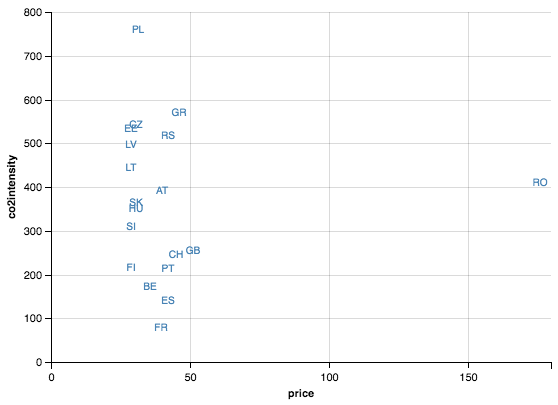

In [35]:
Chart(df).mark_text().encode(
    x='price',
    y='co2intensity',
    text='country'
)

From the graph above we can have the following observations: 

- It does not look like low carbon electricity production has a higher price
- `Romania` has a suprising high price for its electricity production. Almost 3 times higher than other countries. 

## Next Steps

As next steps, it would be interesting to: 
- Explore what's happening with Romania. Is it a data bug? 
- Break down electricity production by sources and investigate high / low price point per electricity mix.
- Fetch data historically in order to average 
- Get data for missing countries. 